In [1]:
import numpy as np
import pandas as pd
import pprint
import networkx as nx
import matplotlib.pyplot as plt

from urllib.request import urlopen

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
def parseData(fname):
  for l in open(fname):
    yield eval(l)

# Problem 1

In [3]:
#Parses the beer data
parsed_beer = list(parseData("beer_50000.json"))

#Uses list comprehension to create lists of all the variables used for the predictive model
cat = [d['beer/style'] for d in parsed_beer]
abv = [d['beer/ABV'] for d in parsed_beer]
aro = [d['review/aroma'] for d in parsed_beer]
appear = [d['review/appearance'] for d in parsed_beer]
pal = [d['review/palate'] for d in parsed_beer]
tas = [d['review/taste'] for d in parsed_beer]
over = [d['review/overall'] for d in parsed_beer]
review_len = [len(d['review/text']) for d in parsed_beer]
stan = [x/max(review_len) for x in review_len]

In [4]:
#Loops through all beer categories to see how many times each category appears
categoryCounts = {}
for d in parsed_beer:
    if d['beer/style'] not in categoryCounts.keys():
        categoryCounts[d['beer/style']] = 0
    categoryCounts[d['beer/style']] += 1

#Stores a dictionary of the indexes for all beer category that have over 1000 appearances
categories = [c for c in categoryCounts if categoryCounts[c] > 1000]
catID = dict(zip(list(categories),range(len(categories))))

In [5]:
#Splits the dataset into 50% train and 50% test
x_train,x_test,y_train,y_test = train_test_split(np.array([cat,aro,appear,pal,tas,over,stan]).T,abv,test_size=0.5)

#Creates empty matrices to allow for the one hot encoding values only
train_matrix = np.zeros((25000,13))
test_matrix = np.zeros((25000,13))

#Converts the y_train and y_test values into binary scores for yes if over 7 and no if less then 7
train_binary = [1 if x > 7 else 0 for x in y_train]
test_binary = [1 if x > 7 else 0 for x in y_test]

#One hot encodes the train and test matricies
for x in range(len(x_train)):
    if x_train[x][0] in catID.keys():
        train_matrix[x][catID[x_train[x][0]]] = 1
    if x_test[x][0] in catID.keys():
        test_matrix[x][catID[x_test[x][0]]] = 1

In [6]:
#Creates Logistic Regression model and stores prediction values
clf = LogisticRegression(C=10,class_weight='balanced').fit(train_matrix, train_binary)
pred = clf.predict(test_matrix)

In [7]:
#Finds the True Positive, False Positive, True Negative, and False Negative array values
TP_ = np.logical_and(pred, test_binary)
FP_ = np.logical_and(pred, np.logical_not(test_binary))
TN_ = np.logical_and(np.logical_not(pred), np.logical_not(test_binary))
FN_ = np.logical_and(np.logical_not(pred), test_binary)

#Finds the number of True Positive, False Positive, True Negative, and False Negative
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

#Converts To Rates
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

# accuracy
#sum(correct) / len(correct)
accuracy = (TP + TN) / (TP + FP + TN + FN)

#Calculates Balanced Error Rate
ber = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
{'BER':ber, 'Accuracy':accuracy}

{'BER': 0.1605647234430716, 'Accuracy': 0.84924}

# Problem 2

In [8]:
#Creates empty matrices to allow for the one hot encoding and the rating and review length values
train_matrix2 = np.zeros((25000,19))
test_matrix2 = np.zeros((25000,19))

#Populates the empty matricies with the proper values
for x in range(len(x_train)):
    if x_train[x][0] in catID.keys():
        train_matrix2[x][catID[x_train[x][0]]] = 1
    if x_test[x][0] in catID.keys():
        test_matrix2[x][catID[x_test[x][0]]] = 1
    
    train_matrix2[x][13] = x_train[x][1]
    train_matrix2[x][14] = x_train[x][2]
    train_matrix2[x][15] = x_train[x][3]
    train_matrix2[x][16] = x_train[x][4]
    train_matrix2[x][17] = x_train[x][5]
    train_matrix2[x][18] = x_train[x][6]
    
    test_matrix2[x][13] = x_test[x][1]
    test_matrix2[x][14] = x_test[x][2]
    test_matrix2[x][15] = x_test[x][3]
    test_matrix2[x][16] = x_test[x][4]
    test_matrix2[x][17] = x_test[x][5]
    test_matrix2[x][18] = x_test[x][6]

In [9]:
#Creates Logistic Regression model and stores prediction values
clf2 = LogisticRegression(C=10,class_weight='balanced',max_iter=500).fit(train_matrix2, train_binary)
pred2 = clf2.predict(test_matrix2)

In [10]:
#Finds the True Positive, False Positive, True Negative, and False Negative array values
TP_2 = np.logical_and(pred2, test_binary)
FP_2 = np.logical_and(pred2, np.logical_not(test_binary))
TN_2 = np.logical_and(np.logical_not(pred2), np.logical_not(test_binary))
FN_2 = np.logical_and(np.logical_not(pred2), test_binary)

#Finds the number of True Positive, False Positive, True Negative, and False Negative
TP2 = sum(TP_2)
FP2 = sum(FP_2)
TN2 = sum(TN_2)
FN2 = sum(FN_2)

#Converts To Rates
TPR2 = TP2/(TP2+FN2)
FPR2 = FP2/(FP2+TN2)
TNR2 = TN2/(TN2+FP2)
FNR2 = FN2/(FN2+TP2)

# accuracy
#sum(correct) / len(correct)
accuracy2 = (TP2 + TN2) / (TP2 + FP2 + TN2 + FN2)

#Calculates Balanced Error Rate
ber2 = 1 - 0.5 * (TP2 / (TP2 + FN2) + TN2 / (TN2 + FP2))
{'BER':ber2, 'Accuracy':accuracy2}

{'BER': 0.14121878798748533, 'Accuracy': 0.86368}

# Problem 3

In [11]:
#Keeps the splits as used in problems 1 and 2 but further splits the test sets into 50/50 so one half validation
val_x,test_x,val_y,test_y=train_test_split(test_matrix2,test_binary,test_size=0.5)

c_values = [0.000001, 0.00001, 0.0001, 0.001]
models = [[train_matrix2,train_binary],[val_x,val_y],[test_x,test_y]]
berDict = {0.000001:[], 0.00001:[], 0.0001:[], 0.001:[]}

#Runs through all 4 C values and computes the BER of Train, Validation, and Test datasets for each C
for x in c_values:
    lr = LogisticRegression(C=x,class_weight='balanced',max_iter=500).fit(train_matrix2, train_binary)
    for y in range(3):
        predC = lr.predict(models[y][0])

        #Finds the True Positive, False Positive, True Negative, and False Negative array values
        TP_C = np.logical_and(predC, models[y][1])
        FP_C = np.logical_and(predC, np.logical_not(models[y][1]))
        TN_C = np.logical_and(np.logical_not(predC), np.logical_not(models[y][1]))
        FN_C = np.logical_and(np.logical_not(predC), models[y][1])

        #Finds the number of True Positive, False Positive, True Negative, and False Negative
        TPC = sum(TP_C)
        FPC = sum(FP_C)
        TNC = sum(TN_C)
        FNC = sum(FN_C)

        #Converts To Rates
        TPRC = TPC/(TPC+FNC)
        FPRC = FPC/(FPC+TNC)
        TNRC = TNC/(TNC+FPC)
        FNRC = FNC/(FNC+TPC)

        #Calculates Balanced Error Rate
        berC = 1 - 0.5 * (TPC / (TPC + FNC) + TNC / (TNC + FPC))
        berDict[x].append(berC)

In [12]:
print('For all C values BER from Left to Right is Train, Validation, then Test')
berDict

For all C values BER from Left to Right is Train, Validation, then Test


{1e-06: [0.3203153573998061, 0.3162886136366819, 0.3113981699051457],
 1e-05: [0.3183763958193091, 0.3145667599185118, 0.30982077474227854],
 0.0001: [0.29569671441750667, 0.29420936522019225, 0.28842378233508525],
 0.001: [0.19729327285490306, 0.1879529242938356, 0.1885960761781582]}

Based on the BER values reported on the Train, Validation, and Test datasets accounting for the 4 different C values, I believe the best model is the one that utilizes the 0.001 C value. I believe this is the case, because it had the lowest BER values across all three datasets. When determining which model is best, in terms of generalization, it is important that the BER for both the validation and test datasets are low. This is because the train BER is meant to be lower, since the model is trained using the train data. So to check for overfitting it is important that unseen data like the validation and test sets are low as well. If it works well for unseen data then the model generalizes.

# Problem 4

In [13]:
#Converts the matrix with all features into a DataFrame and drops the review length column
dfTMOR = pd.DataFrame(train_matrix2).drop(columns=[18])
dfVXOR = pd.DataFrame(val_x).drop(columns=[18])
dfTXOR = pd.DataFrame(test_x).drop(columns=[18])

#Converts the matrix with all features into a DataFrame and drops the ratings columns
dfTMOS = pd.DataFrame(train_matrix2).drop(columns=[13,14,15,16,17])
dfVXOS = pd.DataFrame(val_x).drop(columns=[13,14,15,16,17])
dfTXOS = pd.DataFrame(test_x).drop(columns=[13,14,15,16,17])

#Converts the matrix with all features into a DataFrame and drops the one-hot encoded category columns
dfTMRS = pd.DataFrame(train_matrix2).drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11,12])
dfVXRS = pd.DataFrame(val_x).drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11,12])
dfTXRS = pd.DataFrame(test_x).drop(columns=[0,1,2,3,4,5,6,7,8,9,10,11,12])

In [14]:
modelOR = [[dfTMOR,train_binary],[dfVXOR,val_y],[dfTXOR,test_y]]
berDictOR = {0.000001:[], 0.00001:[], 0.0001:[], 0.001:[]}

#Computes the BER of Train, Validation, and Test datasets for each C with review length dropped
for x in c_values:
    lrOR = LogisticRegression(C=x,class_weight='balanced',max_iter=500).fit(dfTMOR, train_binary)
    for y in range(3):
        predOR = lrOR.predict(modelOR[y][0])

        #Finds the True Positive, False Positive, True Negative, and False Negative array values
        TP_OR = np.logical_and(predOR, modelOR[y][1])
        FP_OR = np.logical_and(predOR, np.logical_not(modelOR[y][1]))
        TN_OR = np.logical_and(np.logical_not(predOR), np.logical_not(modelOR[y][1]))
        FN_OR = np.logical_and(np.logical_not(predOR), modelOR[y][1])

        #Finds the number of True Positive, False Positive, True Negative, and False Negative
        TPOR = sum(TP_OR)
        FPOR = sum(FP_OR)
        TNOR = sum(TN_OR)
        FNOR = sum(FN_OR)

        #Converts To Rates
        TPROR = TPOR/(TPOR+FNOR)
        FPROR = FPOR/(FPOR+TNOR)
        TNROR = TNOR/(TNOR+FPOR)
        FNROR = FNOR/(FNOR+TPOR)

        #Calculates Balanced Error Rate
        berOR = 1 - 0.5 * (TPOR / (TPOR + FNOR) + TNOR / (TNOR + FPOR))
        berDictOR[x].append(berOR)

In [15]:
modelOS = [[dfTMOS,train_binary],[dfVXOS,val_y],[dfTXOS,test_y]]
berDictOS = {0.000001:[], 0.00001:[], 0.0001:[], 0.001:[]}

#Computes the BER of Train, Validation, and Test datasets for each C with ratings dropped
for x in c_values:
    lrOS = LogisticRegression(C=x,class_weight='balanced',max_iter=500).fit(dfTMOS, train_binary)
    for y in range(3):
        predOS = lrOS.predict(modelOS[y][0])

        #Finds the True Positive, False Positive, True Negative, and False Negative array values
        TP_OS = np.logical_and(predOS, modelOS[y][1])
        FP_OS = np.logical_and(predOS, np.logical_not(modelOS[y][1]))
        TN_OS = np.logical_and(np.logical_not(predOS), np.logical_not(modelOS[y][1]))
        FN_OS = np.logical_and(np.logical_not(predOS), modelOS[y][1])

        #Finds the number of True Positive, False Positive, True Negative, and False Negative
        TPOS = sum(TP_OS)
        FPOS = sum(FP_OS)
        TNOS = sum(TN_OS)
        FNOS = sum(FN_OS)

        #Converts To Rates
        TPROS = TPOS/(TPOS+FNOS)
        FPROS = FPOS/(FPOS+TNOS)
        TNROS = TNOS/(TNOS+FPOS)
        FNROS = FNOS/(FNOS+TPOS)

        #Calculates Balanced Error Rate
        berOS = 1 - 0.5 * (TPOS / (TPOS + FNOS) + TNOS / (TNOS + FPOS))
        berDictOS[x].append(berOS)

In [16]:
modelRS = [[dfTMRS,train_binary],[dfVXRS,val_y],[dfTXRS,test_y]]
berDictRS = {0.000001:[], 0.00001:[], 0.0001:[], 0.001:[]}

#Computes the BER of Train, Validation, and Test datasets for each C with one-hot encoded categories dropped
for x in c_values:
    lrRS = LogisticRegression(C=x,class_weight='balanced',max_iter=500).fit(dfTMRS, train_binary)
    for y in range(3):
        predRS = lrRS.predict(modelRS[y][0])

        #Finds the True Positive, False Positive, True Negative, and False Negative array values
        TP_RS = np.logical_and(predRS, modelRS[y][1])
        FP_RS = np.logical_and(predRS, np.logical_not(modelRS[y][1]))
        TN_RS = np.logical_and(np.logical_not(predRS), np.logical_not(modelRS[y][1]))
        FN_RS = np.logical_and(np.logical_not(predRS), modelRS[y][1])

        #Finds the number of True Positive, False Positive, True Negative, and False Negative
        TPRS = sum(TP_RS)
        FPRS = sum(FP_RS)
        TNRS = sum(TN_RS)
        FNRS = sum(FN_RS)

        #Converts To Rates
        TPRRS = TPRS/(TPRS+FNRS)
        FPRRS = FPRS/(FPRS+TNRS)
        TNRRS = TNRS/(TNRS+FPRS)
        FNRRS = FNRS/(FNRS+TPRS)

        #Calculates Balanced Error Rate
        berRS = 1 - 0.5 * (TPRS / (TPRS + FNRS) + TNRS / (TNRS + FPRS))
        berDictRS[x].append(berRS)

In [17]:
print('For all C values BER from Left to Right is Train, Validation, then Test')
pprint.pprint({'One-Hot and Rating BER': berDictOR,'One-Hot and Review Length BER': berDictOR,\
 'Rating and Review Length BER': berDictRS})

For all C values BER from Left to Right is Train, Validation, then Test
{'One-Hot and Rating BER': {1e-06: [0.3204606917467375,
                                    0.31647350065943547,
                                    0.31149246735243086],
                            1e-05: [0.318591098670563,
                                    0.3145667599185118,
                                    0.309990669407586],
                            0.0001: [0.29603364164122636,
                                     0.29408693098457306,
                                     0.2889436127466105],
                            0.001: [0.19706865470575663,
                                    0.1886084983569717,
                                    0.18892651539414174]},
 'One-Hot and Review Length BER': {1e-06: [0.3204606917467375,
                                           0.31647350065943547,
                                           0.31149246735243086],
                                   1e-05: [0.3185910

# Problem 6

In [18]:
#Creates empty sets to store the nodes and edges in a graph
edges = set()
nodes = set()

#Reads each line of the egonet.txt file to populate the edges and nodes set
with open("egonet.txt") as f:
    for line in f.readlines():
        coord_x, coord_y = line.rstrip("\n").split(" ")
        coord_x,coord_y = int(coord_x),int(coord_y)
        edges.add((coord_x,coord_y))
        edges.add((coord_y,coord_x))
        nodes.add(coord_x)
        nodes.add(coord_y)

C:\Users\afong\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


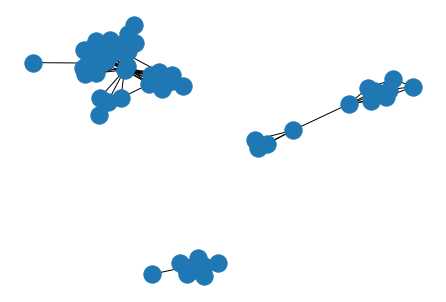

<Figure size 432x288 with 0 Axes>

In [19]:
#Plots a graph of each edge and node to display a visual of all connected components
G = nx.Graph()
for e in edges:
  G.add_edge(e[0],e[1])
nx.draw(G)
plt.show()
plt.clf()

In [20]:
#Finds the number of connected components
num_connect = len(list(nx.connected_components(G)))

#Finds the number of nodes in the largest connected component
num_nodes = len(max(list(nx.connected_components(G))))

In [21]:
{'Connected Components': num_connect,'Nodes In Largest Connected Component': num_nodes}

{'Connected Components': 3, 'Nodes In Largest Connected Component': 40}

# Problem 7

In [22]:
#Sorts a list of all the node ID in the largest connected component
largest = sorted(list(max(list(nx.connected_components(G)))))

#Splits nodes in largest connected component between small and large ID
lowID = largest[:len(largest)//2]
highID = largest[len(largest)//2:]

In [23]:
#Calculates the normalized cut of the small and large ID values split early
#Since the built in networkx normalized cut function is used I needed to divide the answer by two to represent
#the 1/|C| constant that is multiplied in the normalized cut function shown in class
#C is two in this case because there are two communities caused by the cut of the nodes in the largest connected
#component into small and large ID
#The built in networkx normalized cut function does not multiply its result by the 1/|C| constant multiplier
#because it is meant to be used for directed graphs, but the graph here is undirected
nx.normalized_cut_size(G,lowID,highID)/2

0.4224058769513316

# Problem 8

In [24]:
#Creates conditionals for the while loop and to check which list should move which element
first_loop = False
second_loop = False
change = True

#Variables to compare current cost with lowest cost
cut_cost = 1
curr_cost = 10

#Stores current value that led to lowest cost and copies the two lists
num = 0
low = lowID.copy()
high = highID.copy()

#While loop to find lowest cost split
while change == True:
    change = False
    
    #Loop through low list trying each value and checking the cost
    for x in low:
        lowTemp = low.copy()
        highTemp = high.copy()
        lowTemp.remove(x)
        highTemp.append(x)
        curr_cost = nx.normalized_cut_size(G,lowTemp,highTemp)/2
        
        #Checks to see if current cost is less than lowest cost
        if curr_cost < cut_cost:
            cut_cost = curr_cost
            num = x
            first_loop = True
            second_loop = False
            change = True
        
        #Checks to see if current and lowest cost are the same
        if curr_cost == cut_cost:
            if num > x:    
                num = x
                first_loop = True
                second_loop = False
                change = True
                
    #Loop through high list trying each value and checking the cost
    for y in high:
        lowTemp = low.copy()
        highTemp = high.copy()
        highTemp.remove(y)
        lowTemp.append(y)
        curr_cost = nx.normalized_cut_size(G,lowTemp,highTemp)/2
        
        #Checks to see if current cost is less than lowest cost
        if curr_cost < cut_cost:
            cut_cost = curr_cost
            num = y
            first_loop = False
            second_loop = True
            change = True
            
        #Checks to see if current and lowest cost are the same
        if curr_cost == cut_cost:
            if num > y:    
                num = y
                first_loop = False
                second_loop = True
                change = True
                
    #Checks to see if there was a change in cost
    if change == True:
        if first_loop == True:
            low.remove(num)
            high.append(num)
        else:
            high.remove(num)
            low.append(num)

In [25]:
cut_cost

0.09817045961624274

In [26]:
low

[697,
 703,
 708,
 713,
 719,
 745,
 747,
 753,
 769,
 772,
 774,
 798,
 800,
 803,
 805,
 810,
 811,
 819,
 828,
 823,
 830,
 840,
 880,
 890,
 869,
 856]

In [27]:
high

[825, 861, 863, 864, 876, 878, 882, 884, 886, 888, 889, 893, 729, 804]